# **Assignment No. 1**





**Title:** Assignment on Regression technique   
**Aim:** Implement Linear Regression technique on Temperatures Dataset

**Objectives:**

1. Apply Linear Regression using suitable library function and predict the Month-wise temperature

2. Assessthe performance of regression models using MSE, MAE and R-Square metrics

3. Visualize simple regression model.








# **Implementation:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the necessary libraries to perform operations on dataframe
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Import Dataset - temperatures.csv
trainData=pd.read_csv("/content/drive/My Drive/SITS/TE-2021-22/ML/Assignments/Assignment_Regression/temperatures.csv")

## **Dataset Description**

**Link:** https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.csv

This data consists of temperatures of INDIA averaging the temperatures of all places month
wise. Temperatures values are recorded in CELSIUS

No. of samples = 117

No. of Features = 18



In [ ]:
#Explore first 10 rowa in dataset
trainData.head(n=10)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
5,1906,22.28,23.69,27.31,31.93,34.11,32.19,31.01,30.30,29.92,29.55,27.60,24.72,28.73,23.03,31.11,30.86,27.29
6,1907,24.46,24.01,27.04,31.79,32.68,31.92,31.05,29.58,30.67,29.87,27.78,24.44,28.65,24.23,29.92,30.80,27.36
7,1908,23.57,25.26,28.86,32.42,33.02,33.12,30.61,29.55,29.59,29.35,26.88,23.73,28.83,24.42,31.43,30.72,26.64
8,1909,22.67,24.36,29.22,30.79,33.06,31.70,29.81,29.81,30.06,29.25,27.69,23.69,28.38,23.52,31.02,30.33,26.88
9,1910,23.24,25.16,28.48,31.42,33.51,31.84,30.42,29.86,29.82,28.91,26.32,23.37,28.53,24.20,31.14,30.48,26.20


In [ ]:
trainData.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03
116,2017,26.45,29.46,31.60,34.95,35.84,33.82,31.88,31.72,32.22,32.29,29.60,27.18,31.42,27.95,34.13,32.41,29.69


In [ ]:
trainData.shape

(117, 18)

In [ ]:
#Datatypes and all column names
trainData.dtypes
trainData.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [ ]:
# Scaling range of each of these columns
trainData.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [ ]:
#whether dataset consit some null/missing values
#sum function is used in concatinate with isnull function to calculate how many null values are present in each column
trainData.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

# **Explore the dataset**

**Top 10 years having average highest temperature of 12 months (Annual column)**

Create a plot of top 10 samples

figure is a method which allows to manipulate the size of plot on the console/output screen

sns is abbreviation of seaborn library used to create a bar plot.
the reason to use sns instead of matplotlib is - using matplot we can create only simple plot. If we want to create barplot, pyplot, barchart etc. then we have to use seaborn library.

on X-axis ->  Top 10 year values of highest temperature

on Y-axis ->  Annual values


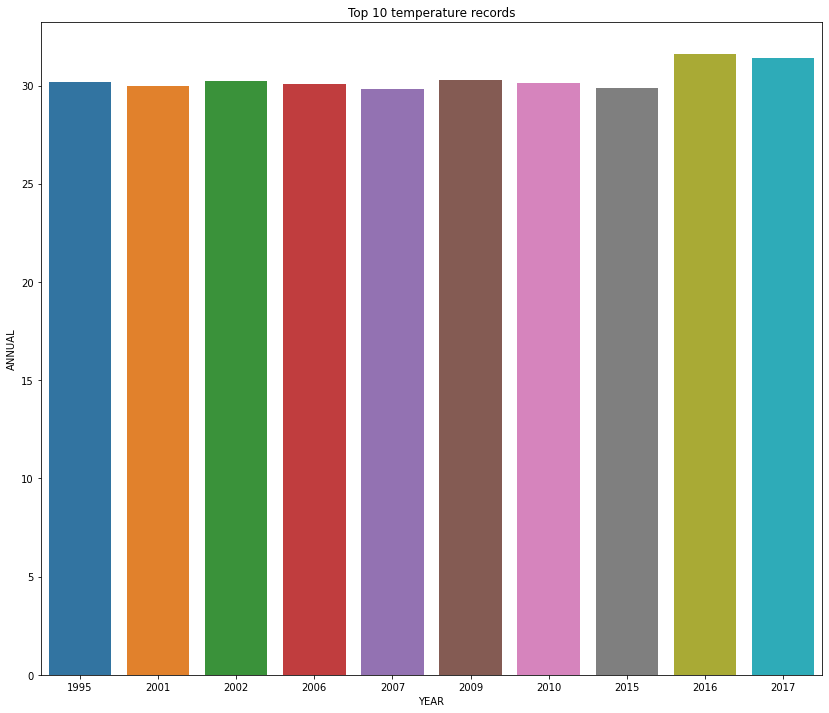

In [ ]:
# Calculating top 10 annual average temperature
top_10_data = trainData.nlargest(10, "ANNUAL")
plt.figure(figsize=(14,12))
plt.title("Top 10 temperature records")
sns.barplot(x=top_10_data.YEAR, y=top_10_data.ANNUAL)


## **It is found that highest record of temperature is in 2016 roughly about 32 degree celsius**

**Calculating top 10  average temperature of only march month**

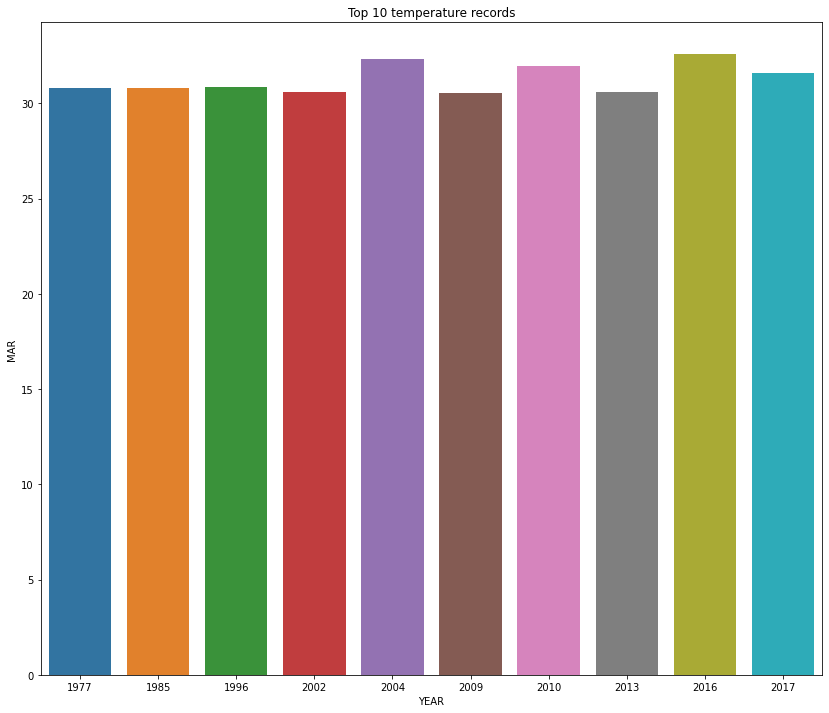

In [ ]:
# Calculating top 10  average temperature of only march month
top_10_data = trainData.nlargest(10, "MAR")
plt.figure(figsize=(14,12))
plt.title("Top 10 temperature records")
sns.barplot(x=top_10_data.YEAR, y=top_10_data.MAR)

# **Define a Model**

Model - Linear model

Metrics - used to access the performance of model

In [ ]:
# Import the function linear model and metrics
from sklearn import linear_model, metrics

In [ ]:
trainData.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [ ]:
#data types of all columns
trainData.dtypes

YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object

In [ ]:
# X stores year column and Y stores temp in jan column
# X is input and Y is output
X=trainData[["YEAR"]]
Y=trainData[["JAN"]]

# **Split dataset into train and test**

Training Data - 80%

Testing Data - 20%

Random state ensures that the output will be repeatable for next time, if not given then there is no quarantee of same output everytime


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
# No. of samples in train dataset
len(X_train)

93

In [ ]:
# No. of samples in test dataset
len(X_test)

24

In [ ]:
trainData.shape

(117, 18)

In [ ]:
# Print X training data
X_train

,YEAR
56,1957
94,1995
35,1936
38,1939
93,1994
...,...
9,1910
72,1973
12,1913
107,2008


In [ ]:
# Print Y training data
Y_train

,JAN
56,22.98
94,24.44
35,23.10
38,23.61
93,24.67
...,...
9,23.24
72,24.02
12,23.71
107,23.97


# **Build a model**

Linear_model class has the method LinearRegression() stored in reg variable

Likewise we have multiple linear regression method, Least square regression method, logistic regression.





In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
print(X_train)

     YEAR
56   1957
94   1995
35   1936
38   1939
93   1994
..    ...
9    1910
72   1973
12   1913
107  2008
37   1938

[93 rows x 1 columns]


**To ensure that the model which is build should fit all the data points. so the line should be best fitted along the hyperplane.**

**How to know the line is best fit?**

**If the mean square error made by the line is minimum then we can say that the line is best fitted. If the error is high then we have to change the line.**


**The line classifies the samples into 2 classes i.e. JAN and YEAR**


**fit function gives us the best fit linear regression line. we pass 2 parameters i.e input is from X_train dataset and output is from Y_train dataset.**

In [ ]:
#fit function gives us the best fit linear regression line
model = reg.fit(X_train, Y_train)

In [1]:
# Which model?
model

NameError: ignored

**To find the R-square error, score function is used.**

**r_sq stores the R-square error of this model. And reg.score(input_var,output_var) will give the R-square error.**

In [ ]:
# find r-square error
r_sq = reg.score(X_train, Y_train)

In [ ]:
# Print determination score i e r-square
print("determination coefficient:", r_sq)

determination coefficient: 0.3548045849122119


**model.intercept_ know the value of intercept**

Linear model is always represented as line. The eq of line is y = mx + c

m is slope of the line which is called as beta-1

x is independent variable

y is dependent variable

c is constant which is called as beta-0, and it is intercept of the y-axis

So, the model where it intercepts the y-axis, that point is called as beta-0



**model.coef_ know the value of slope -**

In simple linear regression model, there is always one coefficient but in multiple linear regression model there are multiple coefficients like beta-1,beta-2,....

In [ ]:
print("intercept:", model.intercept_)

intercept: [-5.35338281]


In [ ]:
print('slope:', model.coef_)

slope: [[0.01486008]]



# **Model Prediction**

We applying the model which is build using X_train, Y_test dataset on X_test

and whateverr the prediction of the model is stored into Y_pred variable


In [ ]:
Y_pred = model.predict(X_test)
print('predicted response:', Y_pred, sep='\n')

predicted response:
[[23.92097555]
 [23.5791937 ]
 [23.75751466]
 [24.58967916]
 [23.98041587]
 [24.35191788]
 [23.35629249]
 [23.68321426]
 [23.86153523]
 [24.32219772]
 [24.30733764]
 [24.3370578 ]
 [22.92535016]
 [23.81695498]
 [24.53023884]
 [23.71293442]
 [24.42621828]
 [24.38163804]
 [23.87639531]
 [23.54947354]
 [24.03985619]
 [23.14825137]
 [24.09929651]
 [23.99527595]]


In [ ]:
#Compare the above predicted value with original Y_test data
print(Y_test)

# **Prediction Plot of train dataset**

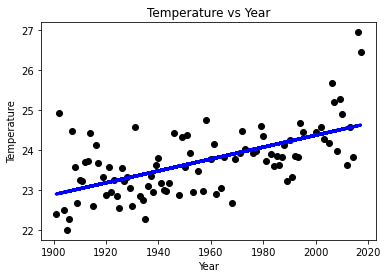

In [ ]:
plt.scatter(X_train, Y_train, color='black')
plt.plot(X_train, reg.predict(X_train), color='blue', linewidth=3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

# **Prediction Plot of test dataset**

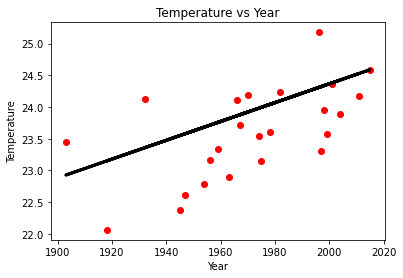

In [ ]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, reg.predict(X_test), color='black', linewidth=3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

In [ ]:
From the above graph it is clear that recorded highest temperature around 25 degree celsius



# Conclusion: Hence,we successfully studied to regression technique. Training Data set and Test Data set.